# <font color='DarkCyan'> Análises em Python </font>

### Joziani Mota Viera

## Modulos de Funções

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_corr(df, size=11):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90) 
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    
def medidas(mod, predict_test_prob):
    predict_test_class = mod.predict(X_teste)
    matrix_conf = metrics.confusion_matrix(Y_teste, predict_test_class, labels = [1, 0])
    #Acuracia
    Acuracia = round(metrics.accuracy_score(Y_teste, predict_test_class),3)
    #Sensibilidade/ — TP/(TP + FN)
    Sensibilidade = round(matrix_conf[1,1]/(matrix_conf[1,1]+matrix_conf[1,0]),3)
    #Especificidade — TN/(TN + FP)
    Especificidade = round(matrix_conf[0,0]/(matrix_conf[0,0]+matrix_conf[0,1]),3)
    AUC = round(metrics.roc_auc_score(Y_teste, predict_test_prob),3)
    
    return(Acuracia,Sensibilidade,Especificidade, AUC)

## Lendo dados

In [2]:
df = pd.read_csv('dados/heart_failure_clinical_records_dataset.csv', encoding = "latin-1", sep = ';')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,0


## Análises Descritivas

In [3]:
num_vivo = len(df[df['DEATH_EVENT'] == 0])
num_morto = len(df[df['DEATH_EVENT'] == 1])
print('Pessoas que permaneceram vidas: {0} ({1:2.2f}%)'.format(num_vivo, (num_vivo/ (num_vivo + num_morto)) * 100))
print('Pessoas que faleceram: {0} ({1:2.2f}%)'.format(num_morto, (num_morto/ (num_vivo + num_morto)) * 100))

Pessoas que permaneceram vidas: 203 (67.89%)
Pessoas que faleceram: 96 (32.11%)


In [4]:
df.drop(columns=['DEATH_EVENT']).describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.648829,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000


## Correlação

In [5]:
df.corr(method = 'spearman')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.070679,-0.091876,-0.090771,0.074207,0.105143,-0.052543,0.270827,-0.101272,0.058083,0.031064,0.217862
anaemia,0.070679,1.000000,-0.216116,-0.012729,0.020366,0.038182,-0.035608,-0.016267,0.061405,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.091876,-0.216116,1.000000,0.042308,-0.067839,-0.080724,0.060033,-0.049936,0.016886,0.013298,-0.030351,0.023616
diabetes,-0.090771,-0.012729,0.042308,1.000000,-0.011906,-0.012732,0.073829,0.001933,-0.055386,-0.157730,-0.147173,-0.001943
ejection_fraction,0.074207,0.020366,-0.067839,-0.011906,1.000000,0.017943,0.053696,-0.177986,0.161695,-0.130792,-0.071748,-0.286869
high_blood_pressure,0.105143,0.038182,-0.080724,-0.012732,0.017943,1.000000,0.069021,-0.089692,0.019281,-0.104615,-0.055711,0.079351
platelets,-0.052543,-0.035608,0.060033,0.073829,0.053696,0.069021,1.000000,-0.051028,0.049453,-0.137433,0.004774,-0.046200
serum_creatinine,0.270827,-0.016267,-0.049936,0.001933,-0.177986,-0.089692,-0.051028,1.000000,-0.300413,0.052184,-0.017048,0.370630
serum_sodium,-0.101272,0.061405,0.016886,-0.055386,0.161695,0.019281,0.049453,-0.300413,1.000000,-0.077084,0.008335,-0.209837
sex,0.058083,-0.094769,0.013298,-0.157730,-0.130792,-0.104615,-0.137433,0.052184,-0.077084,1.000000,0.445892,-0.004316


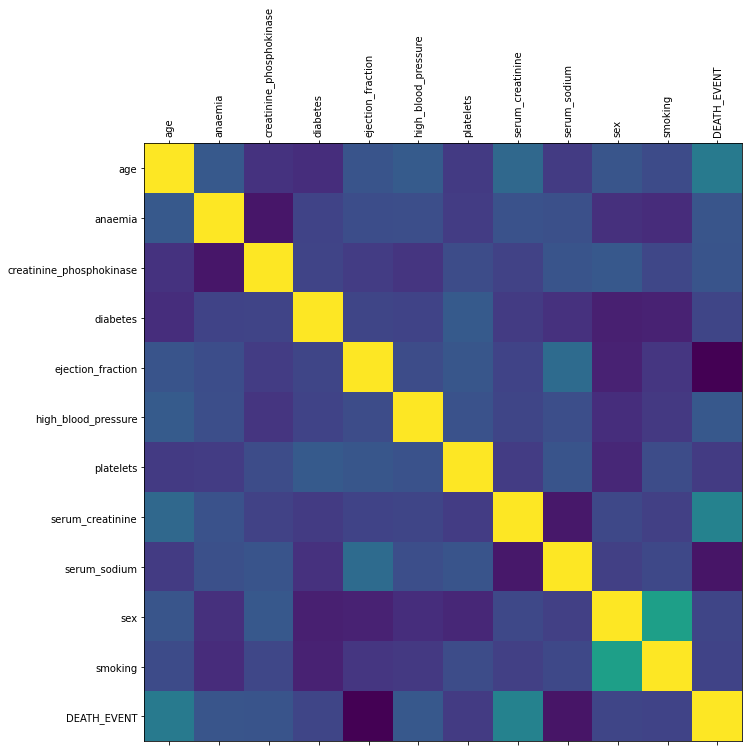

In [6]:
plot_corr(df)

## Método Holdout

In [7]:
from sklearn.model_selection import train_test_split

# Criando objetos
X = df.drop(columns=['DEATH_EVENT']).values

Y = df.DEATH_EVENT.values

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 123)
X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape

((209, 11), (90, 11), (209,), (90,))

## Regressão Logística

In [8]:
from sklearn.linear_model import LogisticRegression

mod_reg1 = LogisticRegression(max_iter = 1000)
mod_reg1 = mod_reg1.fit(X_treino, Y_treino)

predict_reg_prob = mod_reg1.predict_proba(X_teste)
predict_reg_prob = predict_reg_prob[:, 1] # manter somente para a classe positiva

medidas_reg = np.array(medidas(mod_reg1, predict_reg_prob))

print(np.exp(mod_reg1.coef_))

[[1.04935305 1.00277357 1.00014538 0.9993135  0.92424301 1.00240366
  0.99999935 1.02104226 0.99283742 0.99792634 0.9962138 ]]


## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

mod_rf = RandomForestClassifier(random_state = 123)
mod_rf = mod_rf.fit(X_treino, Y_treino.ravel())

predict_rf_prob = mod_rf.predict_proba(X_teste)
predict_rf_prob = predict_rf_prob[:, 1]

medidas_rf = np.array(medidas(mod_rf, predict_rf_prob))

## Support Vector Machines

In [10]:
from sklearn import svm
from sklearn import calibration

mod_svm = svm.SVC(kernel='linear')
mod_svm = mod_svm.fit(X_treino, Y_treino.ravel())

predict_svm_prob = mod_svm.decision_function(X_teste)
medidas_svm = np.array(medidas(mod_svm, predict_svm_prob))

## Medidas

In [11]:
pd.DataFrame({'Regressão' : medidas_reg,'RandomForest': medidas_rf,'SVM' : medidas_svm}, 
             index = ['Acurácia', 'Sensibilidade', 'Especificidade', 'AUC'])

,Regressão,RandomForest,SVM
Acurácia,0.667,0.633,0.600
Sensibilidade,0.887,0.830,0.981
Especificidade,0.351,0.351,0.054
AUC,0.745,0.789,0.689


## Curva ROC

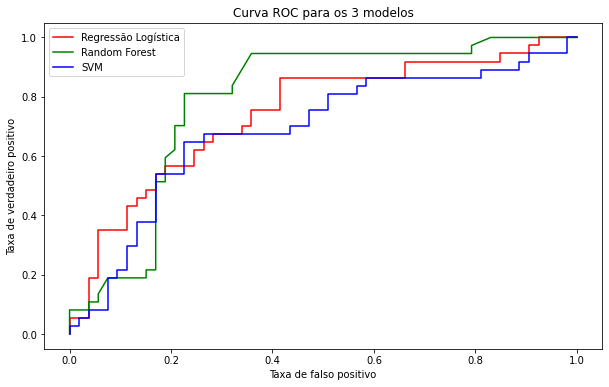

In [12]:
plt.figure(figsize = (10,6))
fpr_reg, tpr_reg, limite1 = metrics.roc_curve(Y_teste, predict_reg_prob)
fpr_rf, tpr_rf, limite2 = metrics.roc_curve(Y_teste, predict_rf_prob)
fpr_svm, tpr_svm, limite3 = metrics.roc_curve(Y_teste, predict_svm_prob)
plt.plot(fpr_reg, tpr_reg, color='red', label='Regressão Logística')
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest')
plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM')
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC para os 3 modelos')
plt.legend()
plt.show()

## Salvando o modelo

In [13]:
import pickle
filename = 'modelos/Modelo Regressão Logística.sav'
pickle.dump(mod_reg1, open(filename, 'wb'))

In [14]:
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[1]


# Fim